# 🧠 PitchDNA: PCA & UMAP Dimensionality Reduction
This notebook loads your `pitcher_long_format.csv` and runs both **PCA** and **UMAP** to visualize pitch similarities.

In [ ]:
# Install UMAP if needed
!pip install umap-learn

In [ ]:
import os
print("Files in directory:", os.listdir())

Files in directory: ['.config', 'sample_data']


In [ ]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /content


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipython-input-12-1755159842.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['umap_1'] = umap_result[:, 0]
/tmp/ipython-input-12-1755159842.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['umap_2'] = umap_result[:, 1]


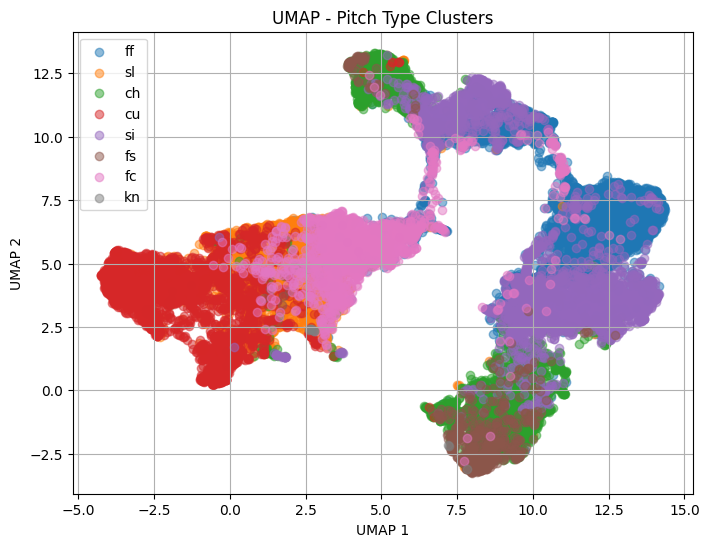

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap.umap_ as umap

# Load your dataset
df = pd.read_csv("pitcher_long_format.csv")


# Select numeric features for dimensionality reduction
features = ['avg_speed', 'avg_spin', 'avg_break_x', 'avg_break_z',
            'avg_break_z_induced', 'avg_break', 'range_speed', 'usage_pct']
df_filtered = df.dropna(subset=features)

# Standardize the features
X = df_filtered[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_result = reducer.fit_transform(X_scaled)
df_filtered['umap_1'] = umap_result[:, 0]
df_filtered['umap_2'] = umap_result[:, 1]


# UMAP Plot
plt.figure(figsize=(8,6))
for pitch in df_filtered['pitch_type'].unique():
    subset = df_filtered[df_filtered['pitch_type'] == pitch]
    plt.scatter(subset['umap_1'], subset['umap_2'], label=pitch, alpha=0.5)
plt.title('UMAP - Pitch Type Clusters')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import pandas as pd

try:
    df = pd.read_csv("pitcher_long_format.csv")
    print("File loaded successfully.")
except FileNotFoundError:
    print("Error: pitcher_long_format.csv not found. Please upload the file.")

File loaded successfully.


In [9]:
import pandas as pd
# ➕ Example: Matching a Pitch from Input
# Define a sample input pitch vector
input_vector = {
    'avg_speed': 94.5,
    'avg_spin': 2300,
    'avg_break_x': 1.1,
    'avg_break_z': -9.3
}

# Create a DataFrame from the input
import numpy as np
input_df = pd.DataFrame([input_vector])

# Ensure the relevant columns exist in the dataset
required_columns = ["avg_speed", "avg_spin", "avg_break_x", "avg_break_z"]
if not all(col in df.columns for col in required_columns):
    raise ValueError("One or more required columns are missing from the dataset.")

# Compute Euclidean distance
from scipy.spatial.distance import euclidean

def get_distance(row):
    return euclidean(
        row[required_columns].values,
        input_df.iloc[0][required_columns].values
    )

# Calculate distances and sort
df["distance"] = df.apply(get_distance, axis=1)
closest_matches = df.sort_values("distance").head(5)
closest_matches[required_columns + ["distance"]]

,avg_speed,avg_spin,avg_break_x,avg_break_z,distance
16339,92.8,2298.0,3.2,-12.3,4.505552
13382,94.3,2298.0,-3.9,-10.3,5.480876
22236,93.7,2296.0,-1.9,-11.6,5.561475
2811,95.3,2302.0,0.7,-14.7,5.827521
5640,93.4,2296.0,-1.0,-14.0,6.611354
